<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/blob/main/Kaggle_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello Team 8 !")

Hello Team 8 !


In [3]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


Importing libraries



In [5]:
#installing lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

Loading datasets

In [6]:
# Load the data
train_df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023-Team-8/Kaggle-Challenge/main/test.csv")


In [7]:
print("Training Dataset shape is: ",train_df.shape)
print("Testing Dataset shape is: ",test_df.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


FInding duplicates value in test train data

In [10]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")

Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


Checking data types

In [11]:
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [12]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


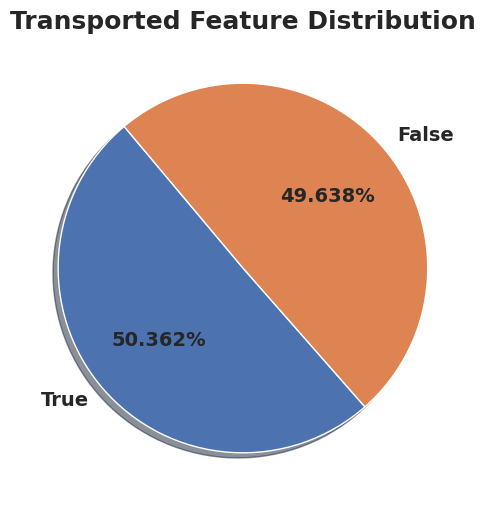

In [13]:
# Define the data and labels
values = train_df["Transported"].value_counts()
labels = values.keys()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%1.3f%%",
    textprops={"fontsize": 14, "fontweight": "bold"},
    shadow=True,
    startangle=130,
)

# Set plot title
plt.title("Transported Feature Distribution", fontsize=18, fontweight='bold')

# Show the plot
plt.show()

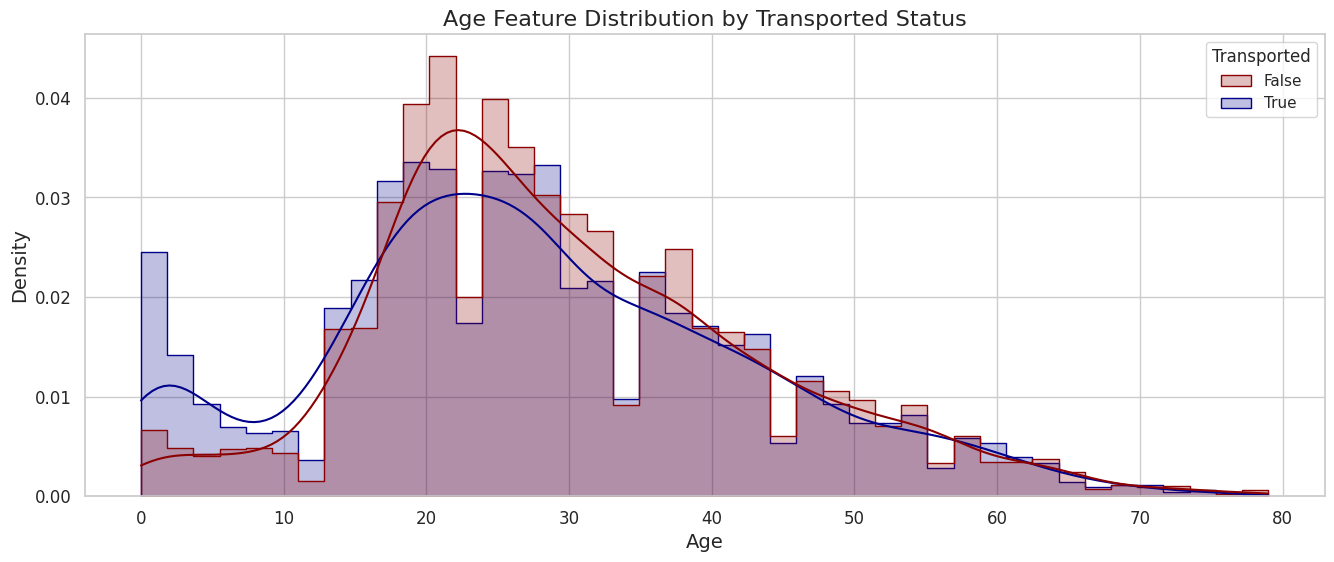

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

custom_palette = ["#8B0000", "#00008B"]

# Create the plot
plt.figure(figsize=(16, 6))
sns.histplot(
    data=train_df,
    x="Age",
    hue="Transported",
    kde=True,
    palette=custom_palette,
    element="step",
    stat="density",
    common_norm=False
)

# Set plot title and labels
plt.title("Age Feature Distribution by Transported Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

Defining by expenditure coloum

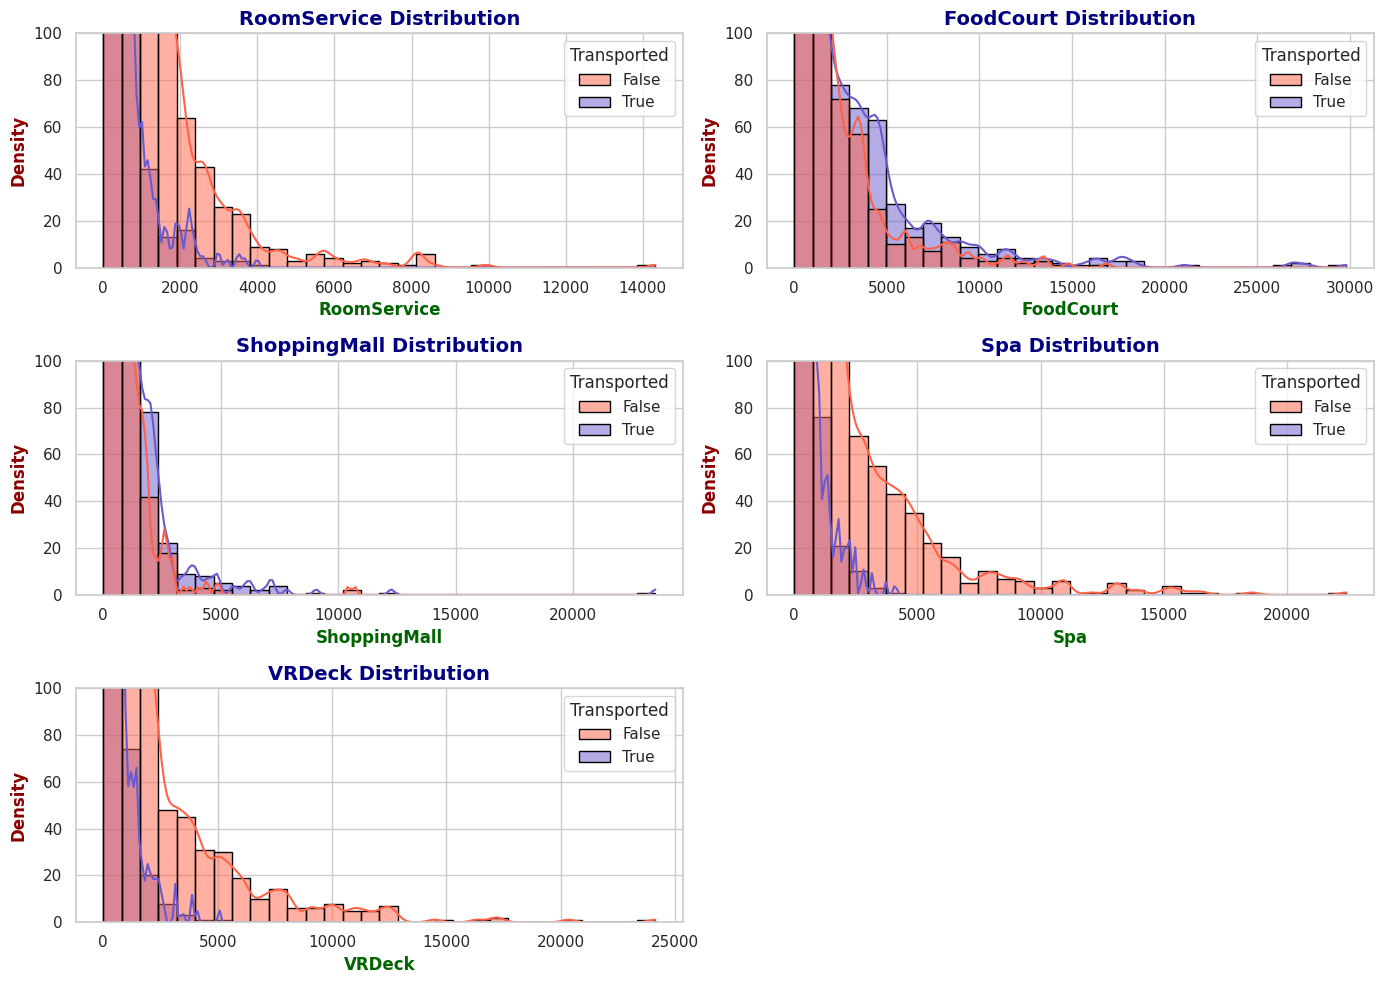

In [15]:
# Define expenditure columns
exp_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Set custom colors for plot
custom_palette = ["#FF6347", "#6A5ACD"]
# Create the plot
plt.figure(figsize=(14, 10))

for idx, column in enumerate(exp_cols):
    plt.subplot(3, 2, idx + 1)
    sns.histplot(
        x=column,
        hue="Transported",
        data=train_df,
        bins=30,
        kde=True,
        palette=custom_palette,
        edgecolor='black',  # Add black edges to bars for visibility
    )
    plt.title(f"{column} Distribution", fontsize=14, fontweight='bold', color='navy')
    plt.xlabel(column, fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel("Density", fontsize=12, fontweight='bold', color='darkred')
    plt.ylim(0, 100)
    plt.tight_layout()

plt.show()

category vs count

In [17]:
train_df["PassengerId"].head().to_frame()

def passengerid_new_features(df):

    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)

    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

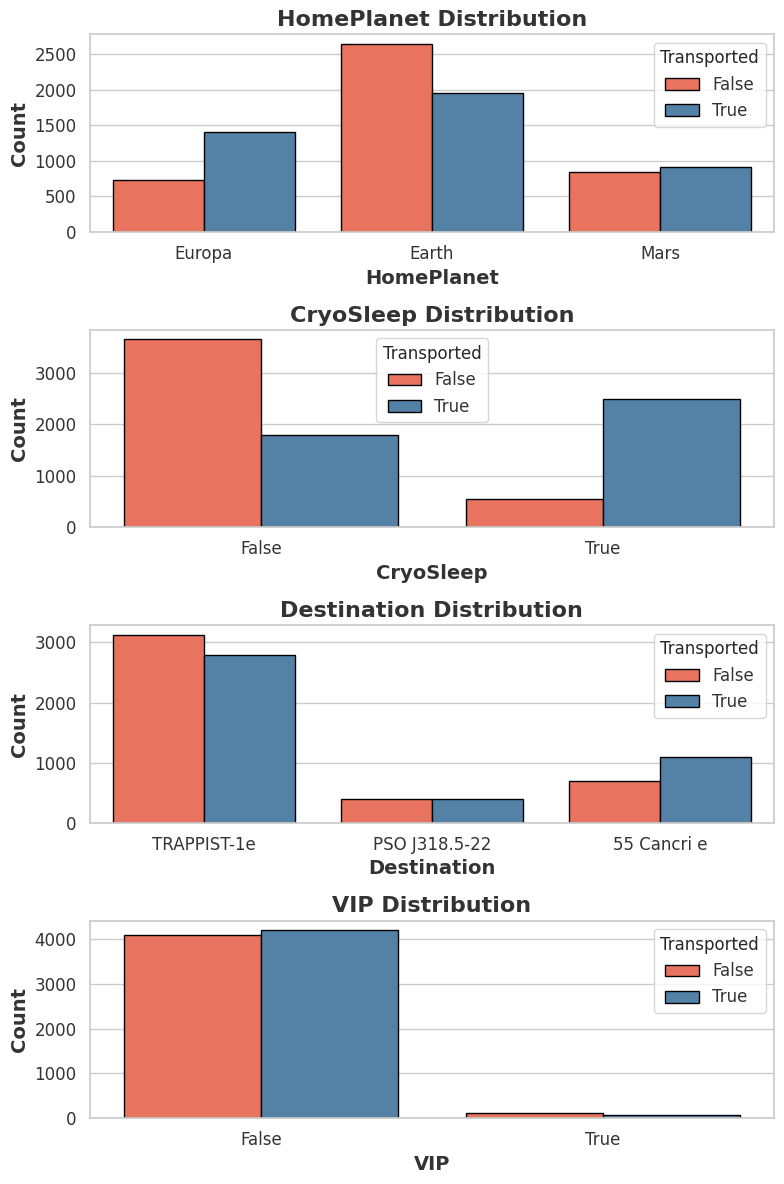

In [18]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

# Define categorical columns
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

# Set custom colors for plot
custom_palette = ["#FF6347", "#4682B4"]

# Create the plot
plt.figure(figsize=(8, 12))

for idx, column in enumerate(cat_cols):
    plt.subplot(4, 1, idx + 1)
    sns.countplot(
        x=column,
        hue="Transported",
        data=train_df,
        palette=custom_palette,
        edgecolor='black',
    )
    plt.title(f"{column} Distribution", fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel(column, fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')
    plt.xticks(fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')
    plt.legend(title="Transported", fontsize=12, title_fontsize=12, labelcolor='#333333')
    plt.tight_layout()

plt.show()

training data frame

In [19]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head(4)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0


In [20]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)
new_exp_features(train_df)
new_exp_features(test_df)